In [20]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'notebook'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [4]:
data = pd.read_csv("C:\\Users\\Ankitha\\OneDrive\\Documents\\Personal_Projects\\supply_chain_data.csv")
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [5]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


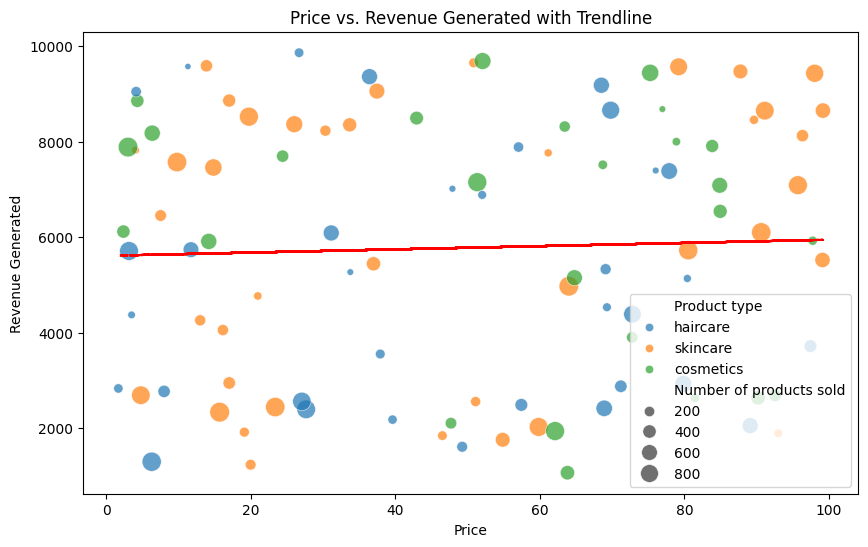

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Revenue generated', hue='Product type', 
                size='Number of products sold', sizes=(20, 200), alpha=0.7)

# Adding a trendline using statsmodels
# Fit OLS model for trendline
X = sm.add_constant(data['Price'])  # Add a constant to the model (intercept)
model = sm.OLS(data['Revenue generated'], X).fit()
trendline = model.predict(X)

# Plot the trendline
plt.plot(data['Price'], trendline, color='red', linestyle='--')

# Labels and Title
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Price vs. Revenue Generated with Trendline')

# Show the plot
plt.show()

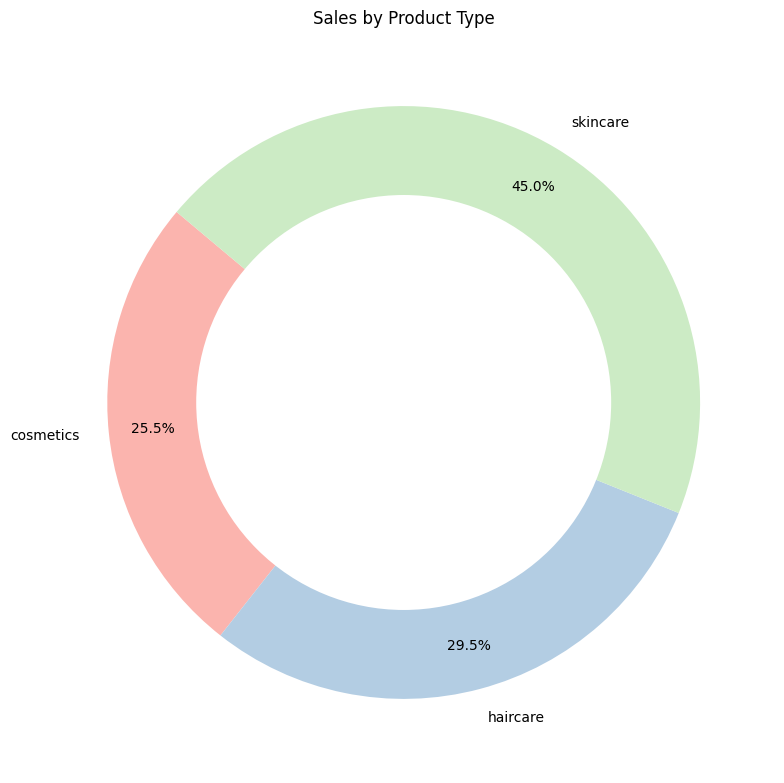

In [22]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

# Extracting data for the pie chart
labels = sales_data['Product type']
sizes = sales_data['Number of products sold']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Pastel1').colors, pctdistance=0.85)

# Drawing a circle at the center of the pie to make it look like a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.title('Sales by Product Type')
plt.tight_layout()
plt.show()

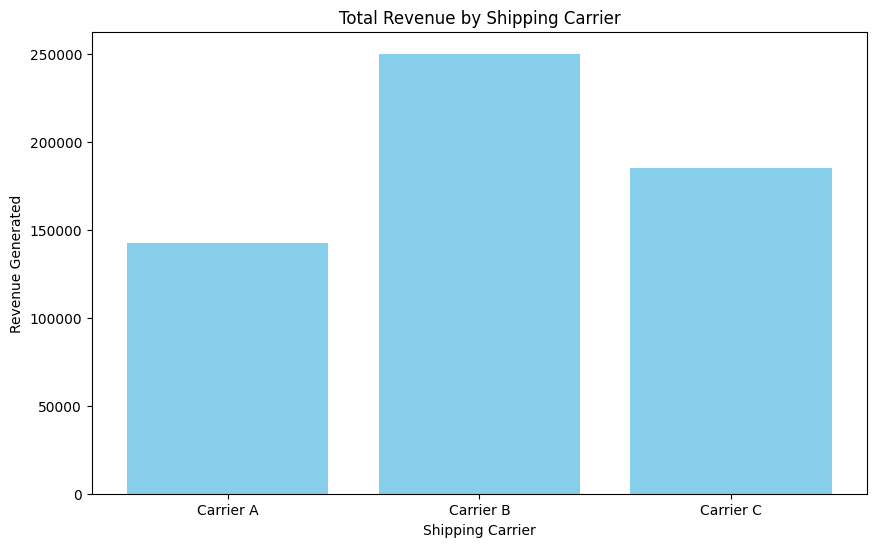

In [23]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

# Extracting data for the bar chart
x = total_revenue['Shipping carriers']
y = total_revenue['Revenue generated']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')

# Adding title and labels
plt.title('Total Revenue by Shipping Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Revenue Generated')

# Displaying the plot
plt.show()

In [9]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


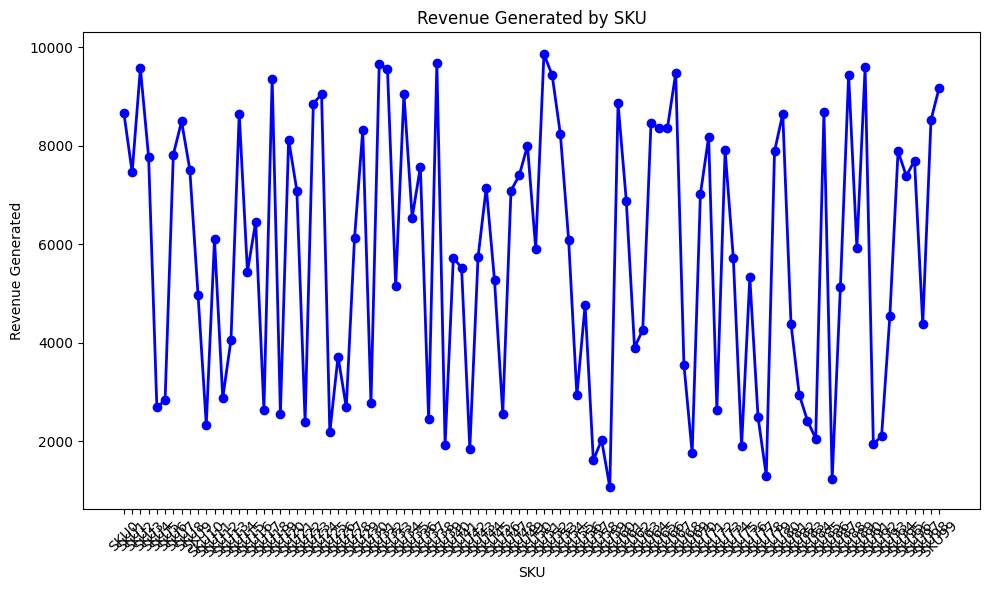

In [24]:
x = data['SKU']
y = data['Revenue generated']

# Creating the line chart
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('Revenue Generated by SKU')
plt.xlabel('SKU')
plt.ylabel('Revenue Generated')

# Optional: Rotate x-axis labels if they are too long
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

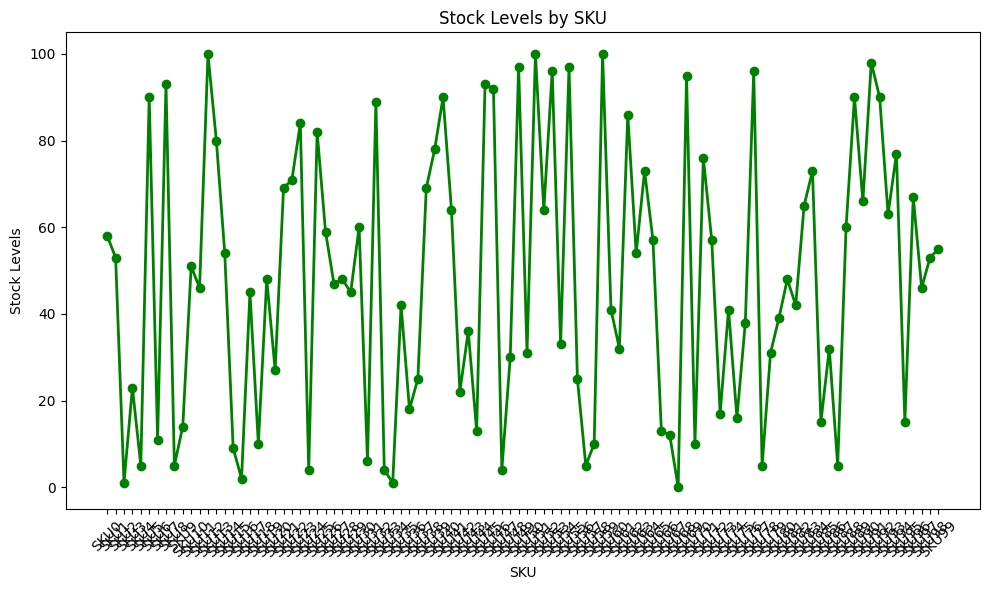

In [25]:
x = data['SKU']
y = data['Stock levels']

# Creating the line chart
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='green', linestyle='-', linewidth=2)

# Adding title and labels
plt.title('Stock Levels by SKU')
plt.xlabel('SKU')
plt.ylabel('Stock Levels')

# Optional: Rotate x-axis labels if they are too long
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

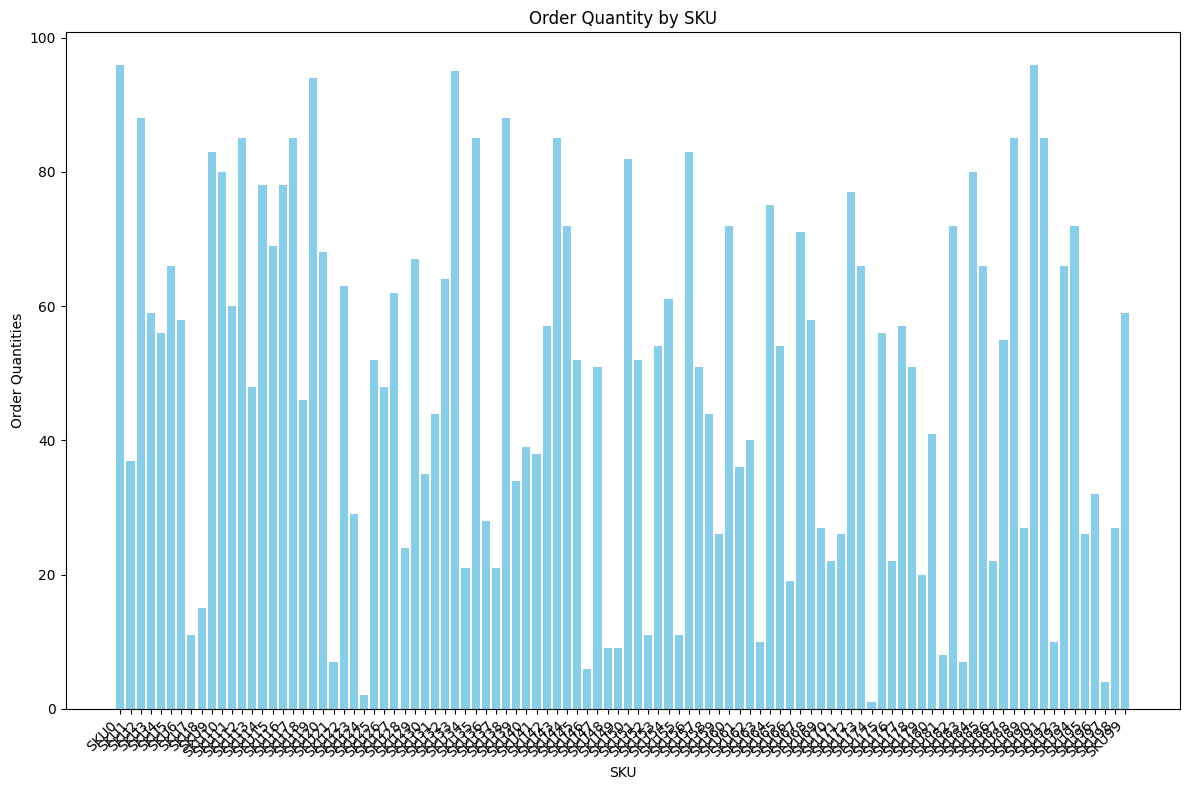

In [26]:
x = data['SKU']
y = data['Order quantities']

# Creating the bar chart
plt.figure(figsize=(12, 8))
plt.bar(x, y, color='skyblue')

# Adding title and labels
plt.title('Order Quantity by SKU')
plt.xlabel('SKU')
plt.ylabel('Order Quantities')

# Optional: Rotate x-axis labels if they are too long
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

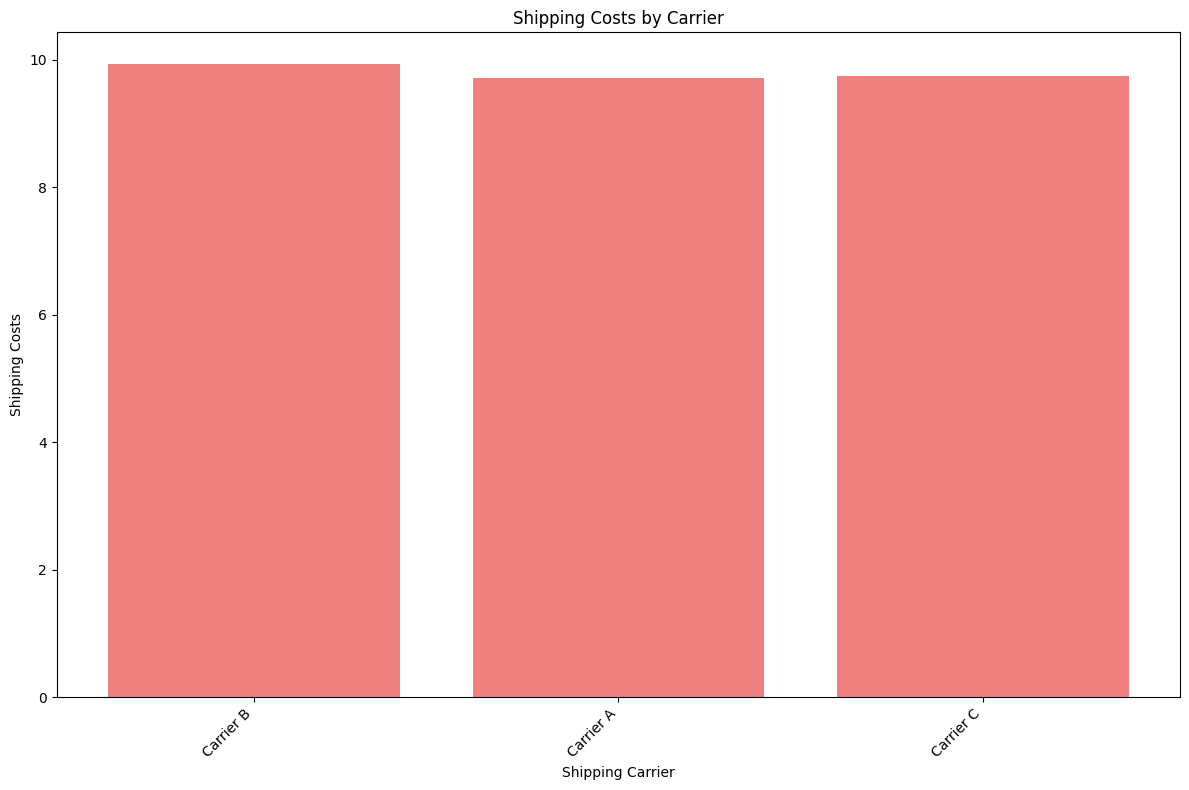

In [27]:
x = data['Shipping carriers']
y = data['Shipping costs']

# Creating the bar chart
plt.figure(figsize=(12, 8))
plt.bar(x, y, color='lightcoral')

# Adding title and labels
plt.title('Shipping Costs by Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Shipping Costs')

# Optional: Rotate x-axis labels if they are too long
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

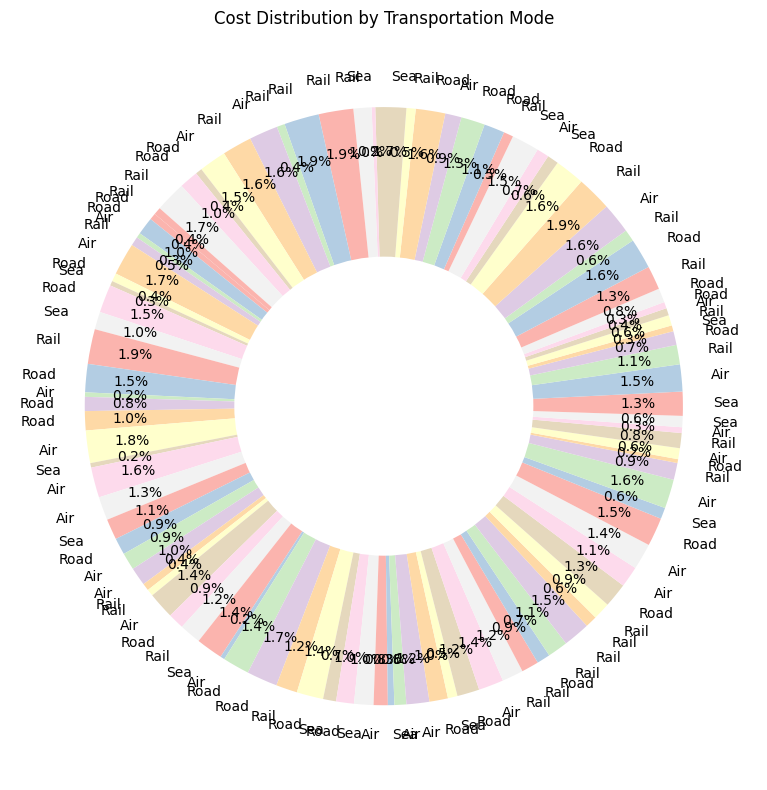

In [28]:
labels = data['Transportation modes']
sizes = data['Costs']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=plt.get_cmap('Pastel1').colors, pctdistance=0.85)

# Drawing a circle at the center to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding title
plt.title('Cost Distribution by Transportation Mode')

# Displaying the plot
plt.tight_layout()
plt.show()

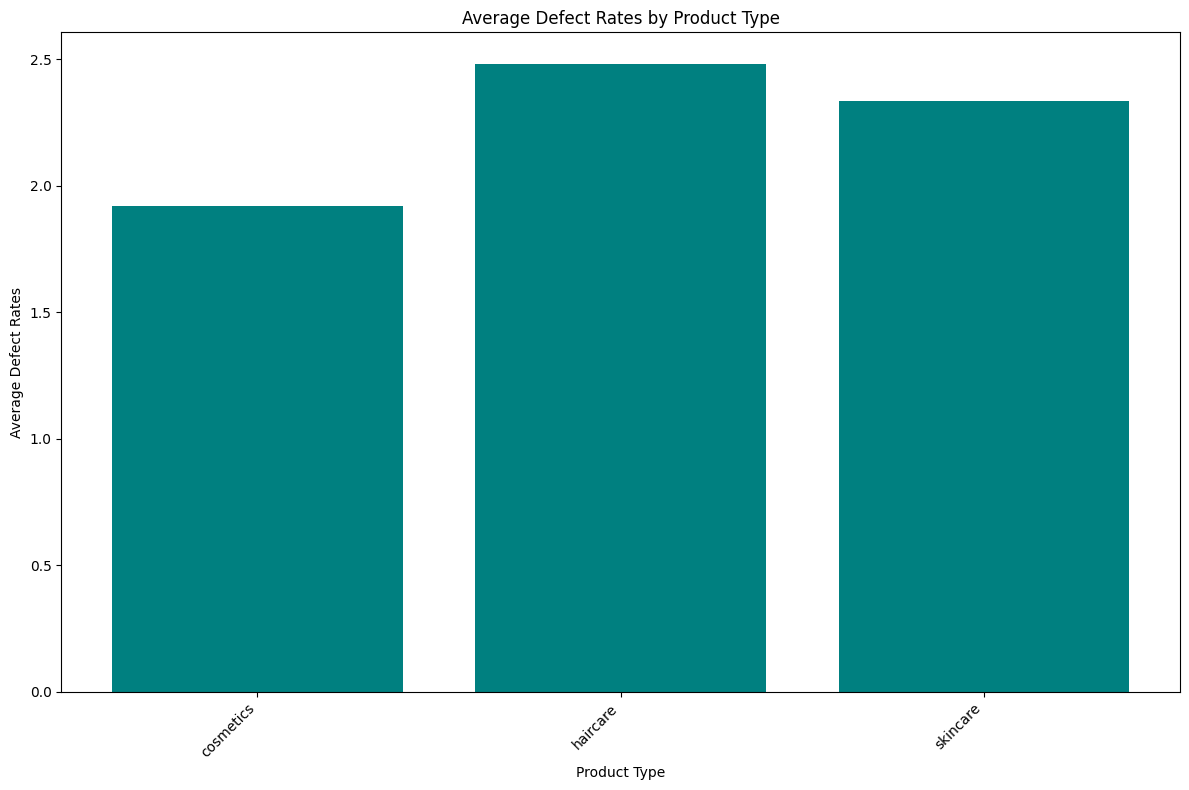

In [31]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()
x = defect_rates_by_product['Product type']
y = defect_rates_by_product['Defect rates']

# Creating the bar chart
plt.figure(figsize=(12, 8))
plt.bar(x, y, color='teal')

# Adding title and labels
plt.title('Average Defect Rates by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Defect Rates')

# Optional: Rotate x-axis labels if they are too long
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

In [32]:
pivot_table = pd.pivot_table(data, values='Defect rates', 
                             index=['Transportation modes'], 
                             aggfunc='mean')

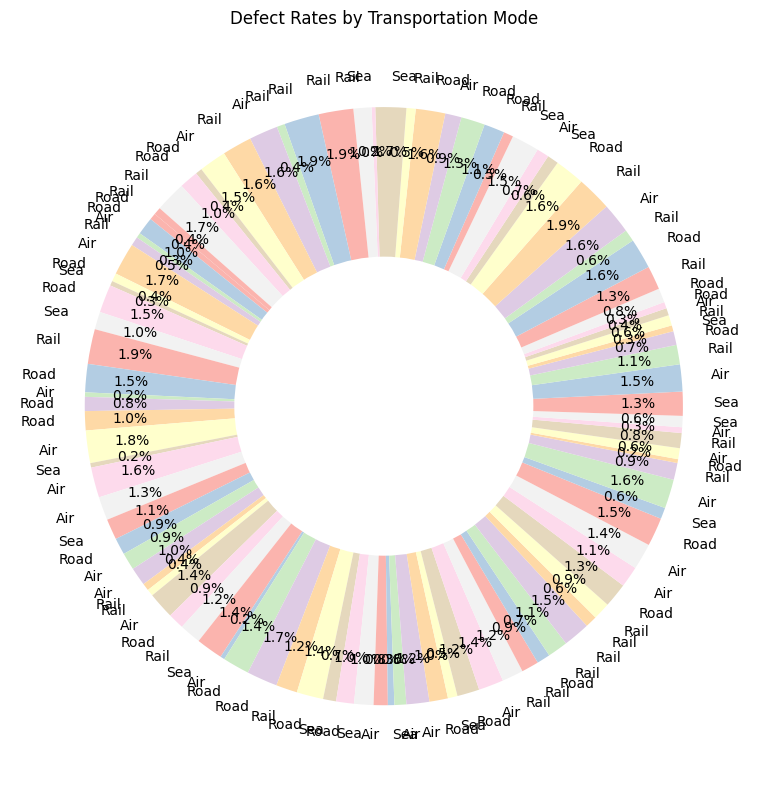

In [33]:


# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=plt.get_cmap('Pastel1').colors, pctdistance=0.85)

# Drawing a circle at the center to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding title
plt.title('Defect Rates by Transportation Mode')

# Displaying the plot
plt.tight_layout()
plt.show()